In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts

In [15]:
df = pd.read_csv(r"D:\Sem - 5\ML- LAB\Assg-2 - Linear Regression\Linear Reg dataSet.csv")

In [16]:
display(df)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [17]:
features = df.iloc[ : , :-1]
Y = df.iloc[ : ,-1]
display(features)
display(Y)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: concrete_compressive_strength, Length: 1030, dtype: float64

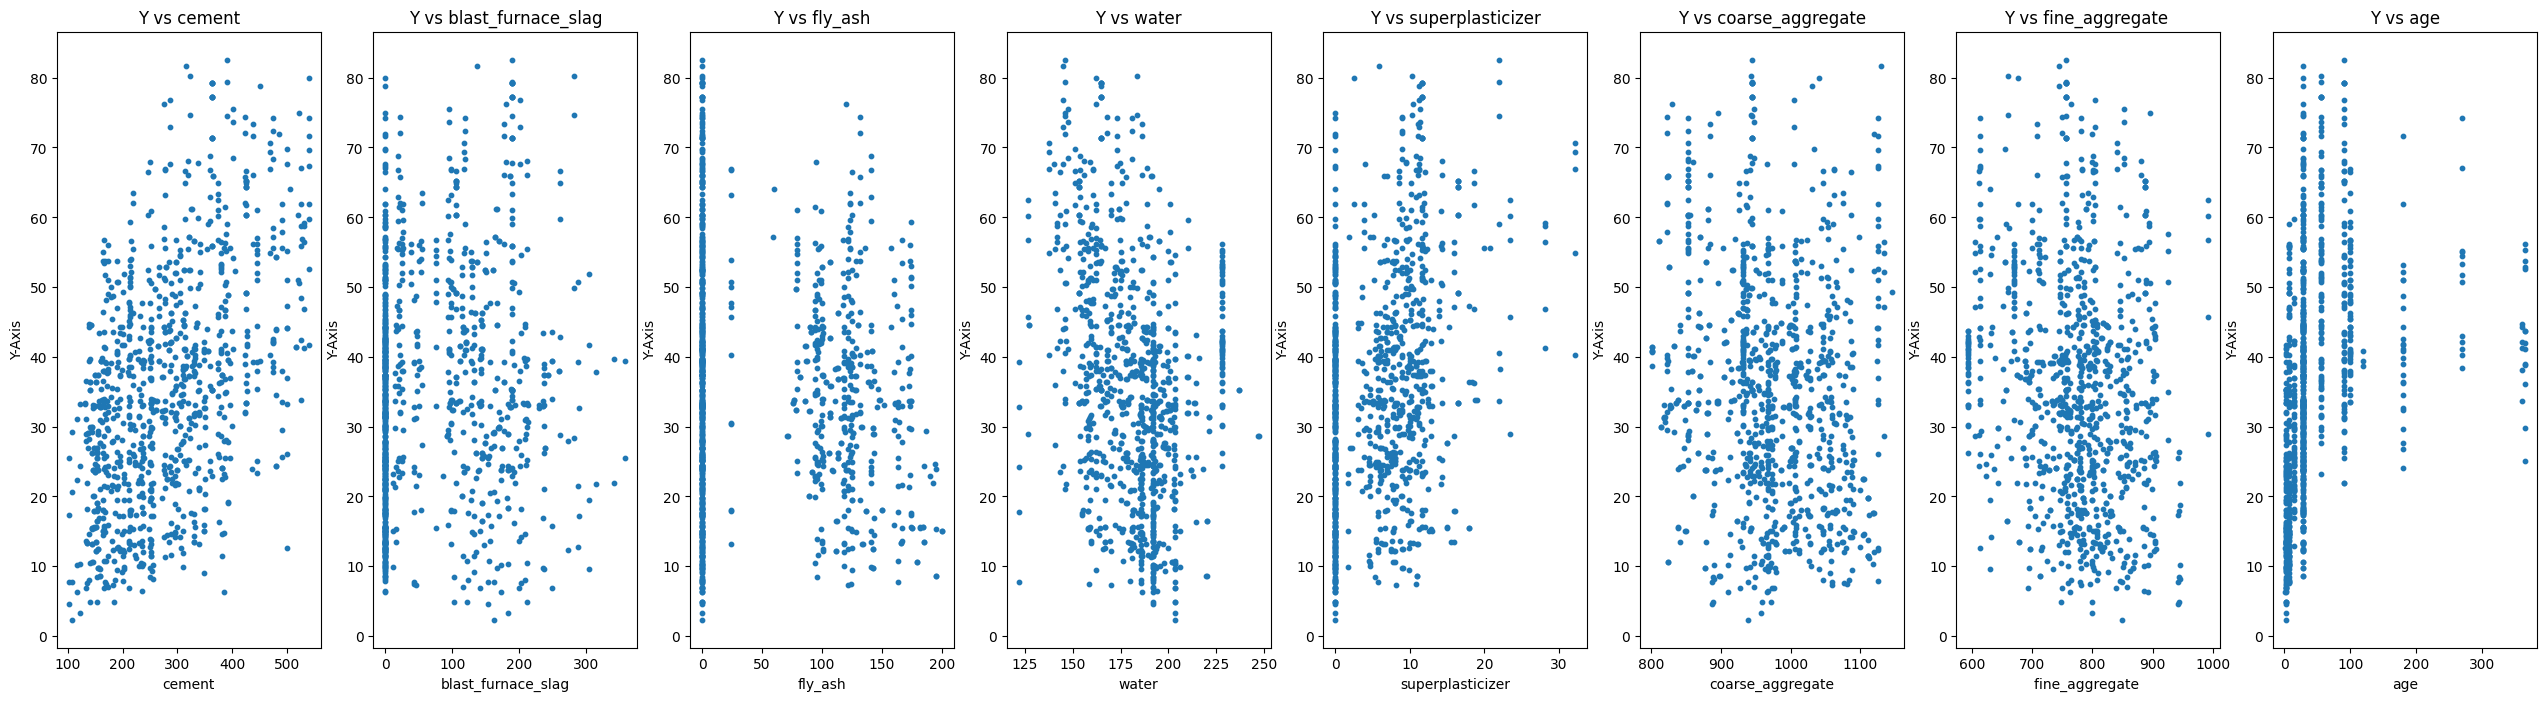

In [18]:
# Create a grid of subplots
num_features = features.shape[1]  # Number of features
fig, axs = plt.subplots(1, num_features, figsize=(32, 8))  # Adjust size and layout

for i in range(num_features):
    axs[i].scatter(features.iloc[:, i], Y, s=10)
    axs[i].set_xlabel(features.columns[i])
    axs[i].set_ylabel('Y-Axis')
    axs[i].set_title(f'Y vs {features.columns[i]}')

plt.show()


In [19]:
features = features.values
Y = Y.values

In [20]:
type(Y)

numpy.ndarray

In [21]:
features = np.c_[np.ones(features.shape[0]), features]

In [22]:
X = df.iloc[ : , 0].values
X = np.c_[np.ones(X.shape[0]), X]

In [23]:
def model(X, Y, iter, alpha):
    costs = []
    m = len(Y)
    thetas = []
    theta = np.zeros(X.shape[1])
    for _ in range(iter):
        ypred = np.dot(X, theta)
        error = ypred - Y
        cost = (1/(2*m))*np.sum(np.square(error))
        dtheta = (1/m)*np.dot(X.T, error)
        theta = theta - alpha * dtheta
        thetas.append(theta[1])
        costs.append(cost)
    return theta, thetas, costs

In [24]:
alphas = [0.1, 0.01, 0.001, 0.0001, 0.00001]
iters = 100000

Training with alpha=0.1


C:\Users\MAAHI\AppData\Local\Temp\ipykernel_13236\3925844508.py:9: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m))*np.sum(np.square(error))
C:\Users\MAAHI\AppData\Local\Temp\ipykernel_13236\3925844508.py:11: RuntimeWarning: invalid value encountered in subtract
  theta = theta - alpha * dtheta


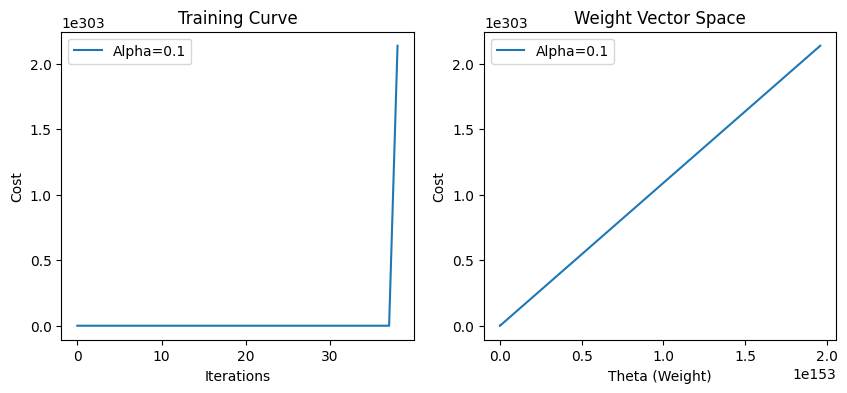

Training with alpha=0.01


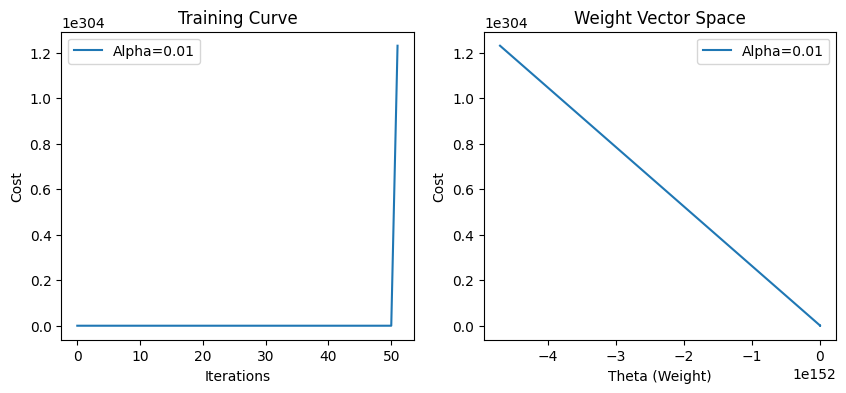

Training with alpha=0.001


d:\Jing-Jing\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


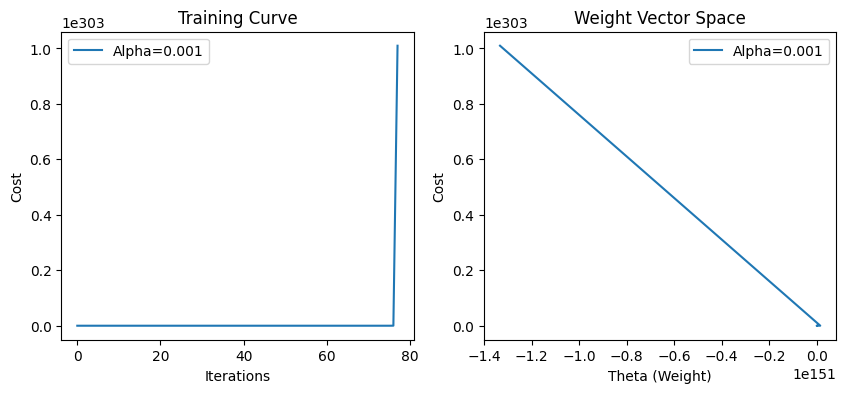

Training with alpha=0.0001


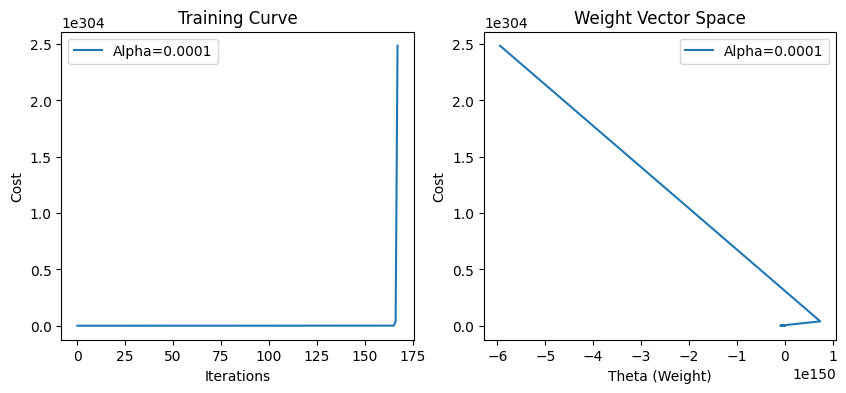

Training with alpha=1e-05


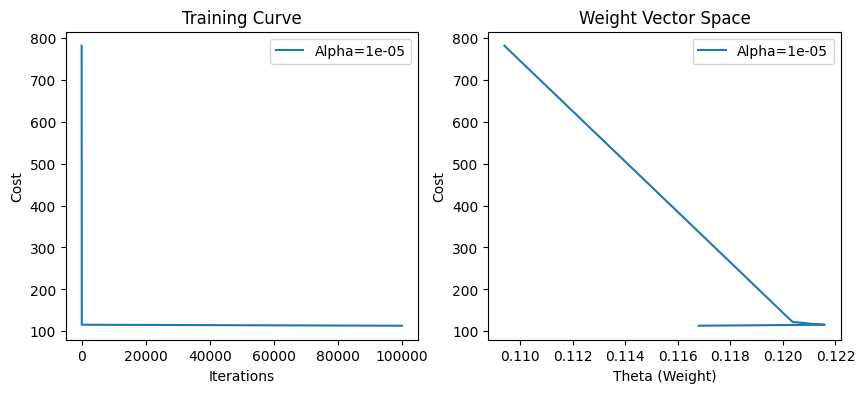

In [25]:
for alpha in alphas:
    print(f"Training with alpha={alpha}")
    theta, thetas, costs = model(X, Y, iters, alpha)

    # Create side-by-side subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns, set figure size
    
    # Plot the Training Curve (Iterations vs Costs)
    axs[0].plot(range(iters), costs, label=f'Alpha={alpha}')
    axs[0].set_xlabel('Iterations')
    axs[0].set_ylabel('Cost')
    axs[0].set_title('Training Curve')
    axs[0].legend()

    # Plot the Weight Vector Space (Theta vs Costs)
    axs[1].plot(thetas, costs, label=f'Alpha={alpha}')
    axs[1].set_xlabel('Theta (Weight)')
    axs[1].set_ylabel('Cost')
    axs[1].set_title('Weight Vector Space')
    axs[1].legend()

    # Adjust layout and display
    plt.show()


In [26]:
test_cases = np.array([[1, 300],  # Test case 1 (bias term + feature value)
                       [1, 500]])  # Test case 2
predictions = np.dot(test_cases, theta)

# Display Predictions
for i, prediction in enumerate(predictions):
    print(f"Test Case {i + 1}: Feature Value = {test_cases[i, 1]}, Predicted Output = {prediction:.4f}")

Test Case 1: Feature Value = 300, Predicted Output = 36.5734
Test Case 2: Feature Value = 500, Predicted Output = 59.9319
